# <B>FOR PROBLEM STATEMENT REFER ANOTHER FILE FROM SAME DIRECTORY
# <B>(FILE NAME: PRCP_1018_Bike_Rental(Hr))

## <b>IMPORTING LIBRARIES AND LOAD DATASET 

#### <b>IMPORTING LIBRARIES

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# statistical imports
import pingouin

In [3]:
# pipeline related imports
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [4]:
# for transformer map
from collections import defaultdict

In [5]:
# preprocessing imports
from sklearn.impute import SimpleImputer

In [6]:
#Split the training and testing data
from sklearn.model_selection import train_test_split

In [7]:
# model import
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [8]:
# Report 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import root_mean_squared_error

In [9]:
# import for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [10]:
import pickle

#### <b>LOAD DATASET

In [11]:
# Loading Dataset:
data= pd.read_csv("day.csv")

In [12]:
dfd = data.copy()
dfd

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [13]:
dfd.drop(columns='instant',inplace=True)

In [14]:
dfd.set_index('dteday',inplace=True)

In [15]:
dfd

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


## <b>BASIC CHECKS

#### <b>CHECK FIRST FIVE ROWS

In [16]:
#Checking first five rows
dfd.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### <B>CHECK LAST FIVE ROWS

In [17]:
#Checking last five rows of datasets
dfd.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


#### <B>CHECK ALL COLUMNS

In [18]:
#Checking all the Columns
dfd.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

#### <B>CHECK SIZE OF DATASET

In [19]:
#Checking Size
dfd.size

10234

#### <B>CHECK SHAPE OF DATASET

In [20]:
#Checking Shape
dfd.shape

(731, 14)

#### <B>CHECK INFO OF DATASET

In [21]:
#Checking info
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 85.7+ KB


#### <B>CHECK DATATYPE OF ALL FEATURES

In [22]:
#Checking datatype of all features
dfd.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### <B>CHECK MISSING VALUES

In [23]:
#checking missing values
dfd.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### <B>CHECK DUPLICATE VALUES

In [24]:
# Check duplicate values in the dataset
dfd.duplicated().sum()

0

#### <B>CHECK STATISTICAL INFO ABOUT NUMERICAL DATA

In [25]:
#Display Statistics info about numerical data
dfd.describe() 

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### <B>CHECKING UNIQUE VALUES IN EACH FEATURE

In [26]:
dfd.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

#### <B>CHECKING DUPLICATE VALUES

In [27]:
dfd.duplicated().sum()

0

#### <B>CHECKING COUNT OF CATEGORICAL COLUMN

In [28]:
# 1) Season Column
dfd['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [29]:
# 2) weekday Column
dfd['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64

In [30]:
# 3) holiday Column
dfd['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [31]:
# 4) workingday Column
dfd['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [32]:
# 5) weathersit Column
dfd['weathersit'].value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

## <b>EXPLORATORY DATA ANALYSIS

   season      cnt season name
2       3  1061129      summer
1       2   918589      spring
3       4   841613        fall
0       1   471348      winter


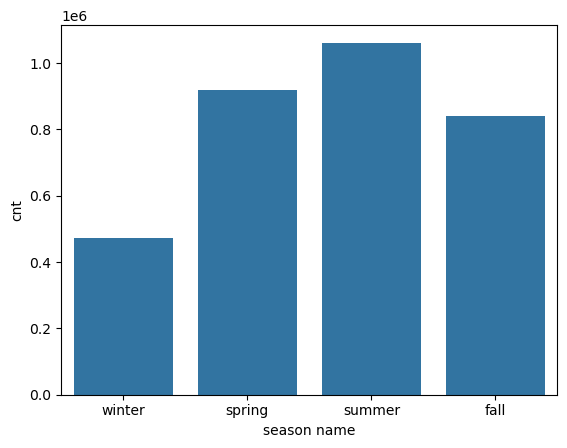

In [33]:
# season vs cnt
season_cnt_grpby = dfd.groupby('season')['cnt'].sum().reset_index()
season_cnt_grpby['season name'] = season_cnt_grpby['season'].map({1:'winter',2:'spring',3:'summer',4:'fall'})
print(season_cnt_grpby.sort_values(by='cnt',ascending=False))
sns.barplot(x=season_cnt_grpby['season name'],y=season_cnt_grpby.cnt,data=season_cnt_grpby)
plt.show()

<b>Insights
- Most bikes rented in summer followed by spring, fall and last winter.

   workingday      cnt Work_Day
1           1  2292410      Yes
0           0  1000269       No


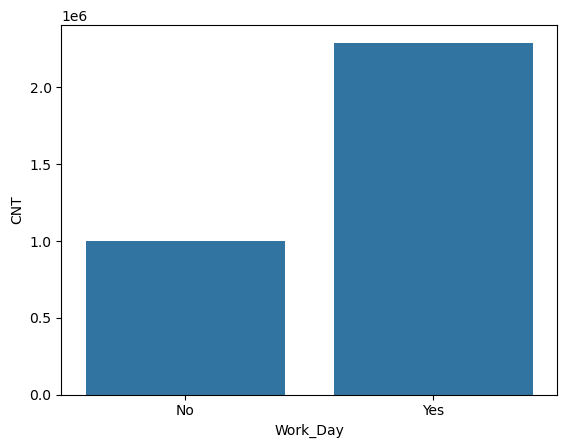

In [35]:
workingday_cnt_grpby = dfd.groupby('workingday')['cnt'].sum().reset_index()
workingday_cnt_grpby['Work_Day'] = workingday_cnt_grpby['workingday'].map({0:'No',1:'Yes'})
print(workingday_cnt_grpby.sort_values(by='cnt',ascending=False))
sns.barplot(x=workingday_cnt_grpby['Work_Day'],y=workingday_cnt_grpby['cnt'],data=workingday_cnt_grpby)
plt.ylabel('CNT')
plt.show()

<b>Insights
- More bikes are rented on work days, this shows that office commuters, students use bikes often.

   weathersit      cnt       weather_condition
0           1  2257952  Clear or Partly Cloudy
1           2   996858          Mist or Cloudy
2           3    37869      Light Rain or Snow


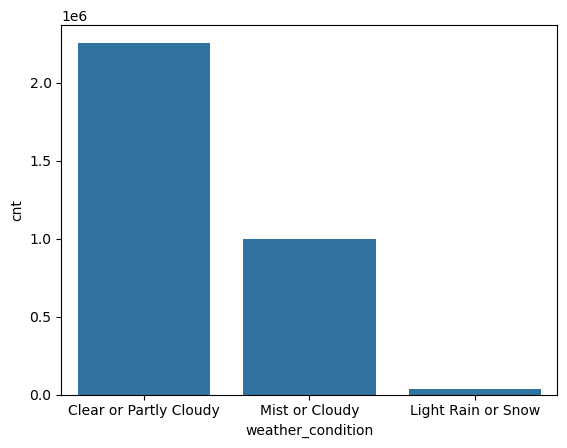

In [36]:
# weathersit vs cnt
weathersit_cnt_grpby = dfd.groupby('weathersit')['cnt'].sum().reset_index()
weathersit_cnt_grpby['weather_condition'] = weathersit_cnt_grpby['weathersit'].map({
    1: "Clear or Partly Cloudy",
    2: "Mist or Cloudy",
    3: "Light Rain or Snow",
    4: "Heavy Rain or Snow"
})
print(weathersit_cnt_grpby.sort_values(by='cnt',ascending=False))
sns.barplot(x=weathersit_cnt_grpby['weather_condition'],y=weathersit_cnt_grpby['cnt'],data=weathersit_cnt_grpby)
plt.show()

<b>Insights
- Riders prefer clear, little clouds weather, they choose to bike even in mist or cloudy condition but half or more choose to avoid biking while in light snow extremely few riders go out.

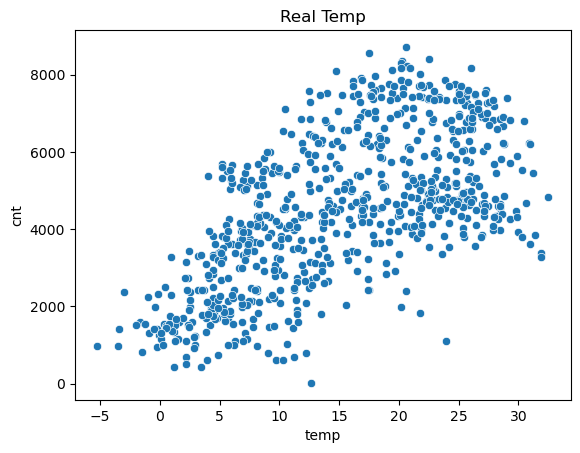

In [37]:
# temp vs cnt
real_temp = dfd['temp'].apply(lambda x : (x*47)-8)
sns.scatterplot(x=real_temp,y=dfd['cnt'])
plt.title('Real Temp')
plt.show()

<b>Insights
- In very less temperatures under 0 degree, very few people choose to cycle.

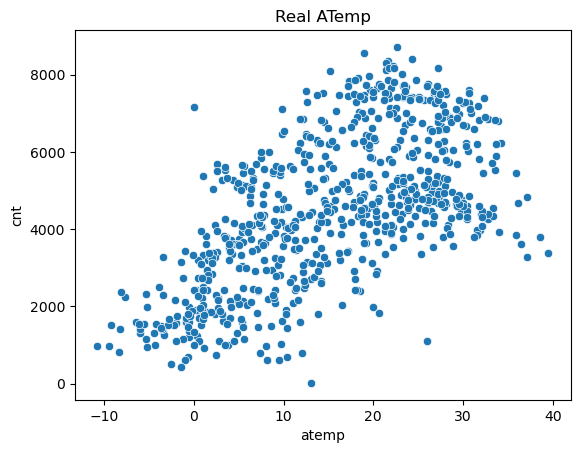

In [38]:
# temp vs cnt
real_atemp = dfd['atemp'].apply(lambda x : (x*66)-16)
sns.scatterplot(x=real_atemp,y=dfd['cnt'])
plt.title('Real ATemp')
plt.show()

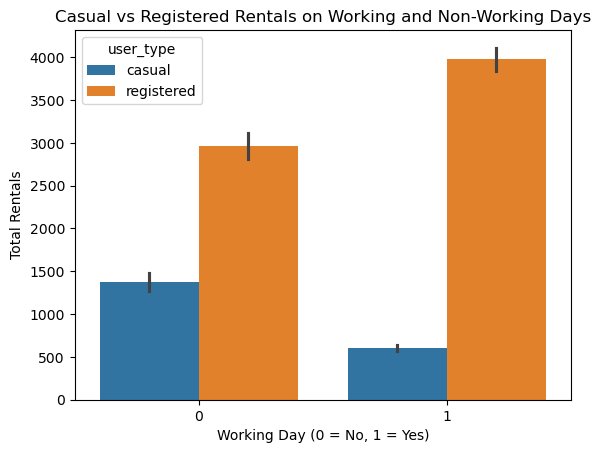

In [39]:
melted = pd.melt(
    dfd,
    id_vars='workingday',               # Column to keep as-is
    value_vars=['casual', 'registered'],# Columns to "melt" (convert from wide → long)
    var_name='user_type',               # New column name for former column headers
    value_name='count'                  # New column name for actual values
)
sns.barplot(x='workingday', y='count', hue='user_type', data=melted)
plt.title("Casual vs Registered Rentals on Working and Non-Working Days")
plt.xlabel("Working Day (0 = No, 1 = Yes)")
plt.ylabel("Total Rentals")
plt.show()

<br>Insights
- There is a drop in casuals on working days meaning some people use bikes just for recreation, exercise.
- Registered users are found more on working days meaning some are not used on non working days, this means that office goers, school, college goers often use bikes as their transport medium, so more focus could go on holding and doing something for registered users.

### <b>STATISTICAL EDA

In [40]:
# lists for categoric and numeric
numeric = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
print('numeric cols: ',numeric)

numeric cols:  ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']


In [41]:
categoric = [ col for col in dfd.columns if col not in numeric]
print(categoric)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'cnt']


In [42]:
dfd.index = pd.to_datetime(dfd.index)

In [43]:
# normality
normal=[]
non_normal=[]
uncertain=[]
normal_df = pingouin.normality(dfd[numeric])['pval']
normal_df
for col in numeric:
    p = normal_df[col]
    if (0.01<p<=0.05):
        uncertain.append(col)
    elif (p<=0.01):
        non_normal.append(col)
    else:
        normal.append(col)
print('normal cols:',normal)
print('non_normal:',non_normal)
print('uncertain:',uncertain)

normal cols: []
non_normal: ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
uncertain: []


In [44]:
# skewness
fairly_skew = []
mod_positive = []
mod_negative = []
heavily_positive = []
heavily_negative = []
for col in numeric:
    _skew = dfd[col].skew()
    if (-0.5<_skew<0.5):
        fairly_skew.append(col)
    elif (0.5<=_skew<=1.0):
        mod_positive.append(col)
    elif (_skew>1.0):
        heavily_positive.append(col)
    elif (-1.0 <=_skew<-0.5):
        mod_negative.append(col)
    elif (_skew<-1.0):
        heavily_negative.append(col)
print('fairly_skew:',fairly_skew)
print('mod_positive',mod_positive)
print('mod_negative',mod_negative)
print('heavily_positive',heavily_positive)
print('heavily_negative',heavily_negative)

fairly_skew: ['temp', 'atemp', 'hum', 'registered']
mod_positive ['windspeed']
mod_negative []
heavily_positive ['casual']
heavily_negative []


In [45]:
(dfd['windspeed']<=0).any()

False

In [46]:
# finding outliers iqr
non_normal_outliers = []
for col in numeric:
    q1 = np.quantile(dfd[col], 0.25)
    q3 = np.quantile(dfd[col], 0.75)
    iqr = q3 - q1
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5 * iqr

    outliers = dfd[(dfd[col] < ll) | (dfd[col] > ul)]
    outlier_ratio = len(outliers) / len(dfd[col])

    if (outlier_ratio < 0.05) and (len(outliers) > 0):
        non_normal_outliers.append(col)

print('Non-normal cols with outliers:', non_normal_outliers)

Non-normal cols with outliers: ['hum', 'windspeed']


In [47]:
# cols for scaling
standard_scaling = []
minmax_scaling = []
for col in numeric:
    print(f'{col} {dfd[col].max()-dfd[col].min()}')

temp 0.8025365999999999
atemp 0.7618264
hum 0.9725
windspeed 0.4850713
casual 3408
registered 6926


In [48]:
dfd.duplicated().sum()

0

In [49]:
dfd.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### <b>CUSTOM TRANSFORMERS

In [50]:
# duplicate handling

class duplicate_handler(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self,X,y=None):
        return self
        
    def set_output(self,transform=None):
        return self
        
    def transform(self,X,y=None):
        X = X.copy()
        X.drop_duplicates(inplace=True)
        X.reset_index(drop=True,inplace=True)
        return X

In [51]:
# square root transformation
class sqrt_transformation(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def set_output(self, transform=None):
        return self

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        for col in X.columns:
            X[col] = np.sqrt(X[col].clip(lower=0))
        return X

In [52]:
class iqr_outlier_handler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.ll_ = {}
        self.ul_ = {}
        self.median_ = {}

    def set_output(self, transform=None):
        return self

    
    
    def fit(self, X, y=None):
        numeric_cols = X.select_dtypes(include=np.number).columns
        for col in numeric_cols:
            q1 = X[col].quantile(0.25)
            q3 = X[col].quantile(0.75)
            iqr = q3 - q1
            self.ll_[col] = q1 - 1.5 * iqr
            self.ul_[col] = q3 + 1.5 * iqr
            self.median_[col] = X[col].median()
        return self

    def transform(self, X, y=None):
        X = X.copy()
        for col in self.ll_:
            ll = self.ll_[col]
            ul = self.ul_[col]
            median = self.median_[col]
            mask = (X[col] < ll) | (X[col] > ul)
            X[col] = X[col].astype(float)
            X.loc[mask, col] = median
        return X

In [53]:
# Column cleaner
class ColumnNameCleaner(BaseEstimator, TransformerMixin):
    def set_output(self, transform=None):
        return self
        
    def fit(self, X, y=None):
        self.columns_ = [col.split('__')[-1] for col in X.columns]
        return self

    def transform(self, X,y=None):
        X.columns = self.columns_
        return X

In [54]:
# class to clean column
class Column_Filterer(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
        
    def set_output(self,transform=None):
        return self
        
    def fit(self,X,y=None):
        return self
        
    def transform(self,X,y=None):
        col_permitted = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit','temp', 'hum', 'windspeed']
        input_missing_cols = [ col for col in col_permitted if col not in X.columns ]
        if input_missing_cols:
            raise ValueError
        else:
            X = X[col_permitted]
            return X

### <b>SPLITING

In [55]:
y = dfd['cnt']
X = dfd.drop(columns=['mnth', 'atemp', 'casual', 'registered','cnt'])

In [56]:
y

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64

In [57]:
X

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
dteday,,,,,,,,,
2011-01-01,1,0,0,6,0,2,0.344167,0.805833,0.160446
2011-01-02,1,0,0,0,0,2,0.363478,0.696087,0.248539
2011-01-03,1,0,0,1,1,1,0.196364,0.437273,0.248309
2011-01-04,1,0,0,2,1,1,0.200000,0.590435,0.160296
2011-01-05,1,0,0,3,1,1,0.226957,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,0,4,1,2,0.254167,0.652917,0.350133
2012-12-28,1,1,0,5,1,2,0.253333,0.590000,0.155471
2012-12-29,1,1,0,6,0,2,0.253333,0.752917,0.124383


### <b>TRAIN AND TEST DATA

In [58]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

### <b>TRANSFORMATION LIST

In [59]:
#duplicate handling
dupicate_handling_list = numeric+categoric
#missing values numeric
missing_numeric_list = numeric
#missing values categoric
missing_categoric_list = categoric
#transformations
square_root_transformation_list = ['windspeed']
#iqr outliers
iqr_outliers = non_normal_outliers

In [60]:
metadata = {
'duplicate handling':numeric+categoric,
'missing values numeric':missing_numeric_list,
'missing values categoric':missing_categoric_list,
'transformations':square_root_transformation_list,
'iqr outliers':iqr_outliers
}

### <B>CREATE TRANSFORMATION MAP

In [61]:
num_cols = metadata['missing values numeric']
cat_cols = metadata['missing values categoric']
outlier_cols = metadata['iqr outliers']
sqrt_cols = metadata['transformations']

In [62]:
transformation_map = defaultdict(list)
for col in numeric:
    step = ['missing_handle_numeric']
    if col in sqrt_cols:
        step.append('square_root_transformation')
    if col in outlier_cols:
        step.append('iqr_outlier_handling')
    step_key = '-> '.join(step)
    transformation_map[step_key].append(col)
for col in categoric:
    transformation_map['missing_handle_categoric'].append(col)

transformation_map = dict(transformation_map)

for k, v in transformation_map.items():
    print(f"{k}: {v}")

missing_handle_numeric: ['temp', 'atemp', 'casual', 'registered']
missing_handle_numeric-> iqr_outlier_handling: ['hum']
missing_handle_numeric-> square_root_transformation-> iqr_outlier_handling: ['windspeed']
missing_handle_categoric: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'cnt']


In [63]:
X_cols = set(X.columns)

for step_key in transformation_map:
    transformation_map[step_key] = [
        col for col in dict.fromkeys(transformation_map[step_key]) if col in X_cols
    ]

In [64]:
step_name_to_transformer = {
'missing_handle_numeric':SimpleImputer(strategy='median'),
'missing_handle_categoric':SimpleImputer(strategy='most_frequent'),
'square_root_transformation':sqrt_transformation(),
'iqr_outlier_handling':iqr_outlier_handler()
}

### <B>STEP TEMPLATES

In [65]:
step_templates = {}
for step in transformation_map.keys():
    step_list = step.split('->')
    step_list = [s.strip() for s in step.split('->')]
    pipeline_steps = []
    for step_name in step_list:
        if step_name not in step_name_to_transformer:
            raise ValueError(f"No transformer found for step: {step_name}")
        pipeline_steps.append((step_name,step_name_to_transformer[step_name]))
    step_templates[step] = Pipeline(pipeline_steps)

for step_key in step_templates:
    pipeline = step_templates[step_key]
    pipeline.steps.append(('clean_names', ColumnNameCleaner()))

In [66]:
step_templates

{'missing_handle_numeric': Pipeline(steps=[('missing_handle_numeric', SimpleImputer(strategy='median')),
                 ('clean_names', ColumnNameCleaner())]),
 'missing_handle_numeric-> iqr_outlier_handling': Pipeline(steps=[('missing_handle_numeric', SimpleImputer(strategy='median')),
                 ('iqr_outlier_handling', iqr_outlier_handler()),
                 ('clean_names', ColumnNameCleaner())]),
 'missing_handle_numeric-> square_root_transformation-> iqr_outlier_handling': Pipeline(steps=[('missing_handle_numeric', SimpleImputer(strategy='median')),
                 ('square_root_transformation', sqrt_transformation()),
                 ('iqr_outlier_handling', iqr_outlier_handler()),
                 ('clean_names', ColumnNameCleaner())]),
 'missing_handle_categoric': Pipeline(steps=[('missing_handle_categoric',
                  SimpleImputer(strategy='most_frequent')),
                 ('clean_names', ColumnNameCleaner())])}

In [67]:
preprocessor = ColumnTransformer([
    (step_key, step_templates[step_key], cols)
    for step_key, cols in transformation_map.items()
])

In [68]:
preprocessor = preprocessor.set_output(transform="pandas")

In [69]:
preprocessor

ColumnTransformer(transformers=[('missing_handle_numeric',
                                 Pipeline(steps=[('missing_handle_numeric',
                                                  SimpleImputer(strategy='median')),
                                                 ('clean_names',
                                                  ColumnNameCleaner())]),
                                 ['temp']),
                                ('missing_handle_numeric-> '
                                 'iqr_outlier_handling',
                                 Pipeline(steps=[('missing_handle_numeric',
                                                  SimpleImputer(strategy='median')),
                                                 ('iqr_outlier_handling',
                                                  iqr_outlier_handle...
                                                 ('square_root_transformation',
                                                  sqrt_transformation()),
                                                 ('iqr_outlier_handling',
                                                  iqr_outlier_handler()),
                                                 ('clean_names',
                                                  ColumnNameCleaner())]),
                                 ['windspeed']),
                                ('missing_handle_categoric',
                                 Pipeline(steps=[('missing_handle_categoric',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('clean_names',
                                                  ColumnNameCleaner())]),
                                 ['season', 'yr', 'holiday', 'weekday',
                                  'workingday', 'weathersit'])])

In [70]:
multicollinear_cols = []
corr_ = dfd.corr().abs()
mask = np.triu(np.ones(corr_.shape),k=1).astype(bool)
corr_ = corr_.where(mask)
for col in corr_.columns:
    for row in corr_.index:
        if (corr_.loc[row,col]>0.9):
            multicollinear_cols.append((row,col,round(corr_.loc[row,col],5)))
print('multicollinear cols are:\n',multicollinear_cols)

multicollinear cols are:
 [('temp', 'atemp', 0.9917), ('registered', 'cnt', 0.94552)]


In [71]:
xtrain_proc = preprocessor.fit_transform(xtrain, ytrain)
xtest_proc = preprocessor.transform(xtest)

### <B>MODEL TRAINING

#### <B>1) LINEAR REGRESSION
#### <B>2) SUPPORT VECTOR REGRESSOR
#### <B>3) DECISION TREE REGRESSOR
#### <B>4) RANDOM FOREST REGRESSOR
#### <B>5) GRADIENT BOOSTING REGRESSOR
#### <B>6) XGB REGRESSOR

In [72]:
models = [
    LinearRegression(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor()
]

for model in models:
    temp_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    temp_pipeline.fit(xtrain, ytrain)
    ypred = temp_pipeline.predict(xtest)
    
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = root_mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    adj_r2 = 1-(1-r2)*(len(ytest)-1)/(len(ytest)-xtrain.shape[1]-1)
    
    print(f"{model.__class__.__name__}")
    print(f"  MAE  : {mae:.2f}")
    print(f"  MSE  : {mse:.2f}")
    print(f"  RMSE : {rmse:.2f}")
    print(f"  R²   : {r2:.3f}")
    print(f"  Adj R²: {adj_r2:.3f}")
    print("----------------------------------------------------------")

LinearRegression
  MAE  : 630.01
  MSE  : 706476.90
  RMSE : 840.52
  R²   : 0.824
  Adj R²: 0.812
----------------------------------------------------------
SVR
  MAE  : 1704.14
  MSE  : 4051916.36
  RMSE : 2012.94
  R²   : -0.010
  Adj R²: -0.077
----------------------------------------------------------
DecisionTreeRegressor
  MAE  : 635.58
  MSE  : 838694.86
  RMSE : 915.80
  R²   : 0.791
  Adj R²: 0.777
----------------------------------------------------------
RandomForestRegressor
  MAE  : 455.39
  MSE  : 469792.75
  RMSE : 685.41
  R²   : 0.883
  Adj R²: 0.875
----------------------------------------------------------
GradientBoostingRegressor
  MAE  : 462.88
  MSE  : 436515.53
  RMSE : 660.69
  R²   : 0.891
  Adj R²: 0.884
----------------------------------------------------------
XGBRegressor
  MAE  : 471.47
  MSE  : 482103.06
  RMSE : 694.34
  R²   : 0.880
  Adj R²: 0.872
----------------------------------------------------------


#### <B>7) KNN REGRESSOR

In [73]:
# find optimal k
rmse_val = [] 
for K in range(1,20):
    
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(xtrain, ytrain)  #fit the model
    pred=model.predict(xtest) #make prediction on test set
    error = np.sqrt(mean_squared_error(ytest,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
print('rmse_val :',rmse_val)

rmse_val : [1157.523026908376, 1069.6844804684706, 1034.665172726088, 1051.2198839789842, 1058.7576494515206, 1039.6929427263372, 1025.808183804233, 1007.5173851384861, 982.6609642133594, 998.5404617107258, 999.2095907018503, 1004.3256775853231, 1009.8320507291644, 1024.562445099416, 1045.2393182767548, 1065.1804103659335, 1079.9848805566724, 1105.9772340456475, 1124.7943723735643]


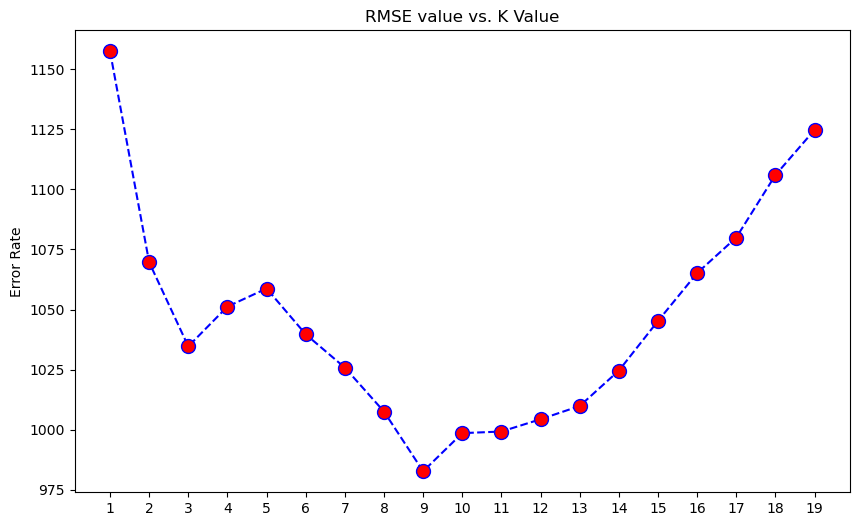

In [74]:
# Lets plot the k-value and error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,20),rmse_val,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('RMSE value vs. K Value')
plt.xticks(ticks=range(1, 20))  # Force x-axis ticks to show only integers
plt.ylabel('Error Rate')
plt.show()

In [76]:
knnr = KNeighborsRegressor(n_neighbors=9)

In [77]:
knnr.fit(xtrain_proc,ytrain)

KNeighborsRegressor(n_neighbors=9)

In [78]:
knnr_ypred = knnr.predict(xtest_proc)

In [79]:
# Evaluate
mae = mean_absolute_error(ytest, knnr_ypred)
mse = mean_squared_error(ytest, knnr_ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, knnr_ypred)
adj_r2 = 1 - (1 - r2) * (xtest_proc.shape[0] - 1) / (xtest_proc.shape[0] - xtest_proc.shape[1] - 1)

# Print results
print(f"MAE         : {mae:.2f}")
print(f"MSE         : {mse:.2f}")
print(f"RMSE        : {rmse:.2f}")
print(f"R²          : {r2:.3f}")
print(f"Adjusted R² : {adj_r2:.3f}")

MAE         : 763.65
MSE         : 979265.36
RMSE        : 989.58
R²          : 0.756
Adjusted R² : 0.740


<B>Insight
- cnt col does not have outliers. If we check these metrics we find except for linear regressor all models are overfitting. Still we choose gb regressor, xgb regressor for hyperparameter tuning.

In [80]:
gb_pipeline = Pipeline([
                        ('keep cols consistent',Column_Filterer()),
                        ('duplicate_remover',duplicate_handler()),
                        ('pre-processing_steps',preprocessor),
                        ('model',GradientBoostingRegressor(random_state=42))])
gb_pipeline.fit(xtrain,ytrain)
ypred_gb_pipeline = gb_pipeline.predict(xtest)
#evaluate
mae = mean_absolute_error(ytest, ypred_gb_pipeline)
mse = mean_squared_error(ytest, ypred_gb_pipeline)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred_gb_pipeline)
adj_r2 = 1 - (1 - r2) * (xtest.shape[0] - 1) / (xtest.shape[0] - xtest.shape[1] - 1)

print(f"MAE       : {mae:.2f}")
print(f"MSE       : {mse:.2f}")
print(f"RMSE      : {rmse:.2f}")
print(f"R²        : {r2:.3f}")
print(f"Adjusted R² : {adj_r2:.3f}")

MAE       : 463.13
MSE       : 435430.27
RMSE      : 659.87
R²        : 0.891
Adjusted R² : 0.884


In [81]:
param_grid = {
'model__n_estimators':[100,200,500],
'model__learning_rate':[0.001,0.01,0.1,0.2],
'model__max_depth':[2,3,4]
             }
gcv_gb_pipeline = GridSearchCV(estimator=gb_pipeline,param_grid=param_grid,cv=5,n_jobs=-1,verbose=0,scoring='neg_root_mean_squared_error')
gcv_gb_pipeline.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('keep cols consistent',
                                        Column_Filterer()),
                                       ('duplicate_remover',
                                        duplicate_handler()),
                                       ('pre-processing_steps',
                                        ColumnTransformer(transformers=[('missing_handle_numeric',
                                                                         Pipeline(steps=[('missing_handle_numeric',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('clean_names',
                                                                                          ColumnNameCleaner())]),
                                                                         ['temp']),
                                                                        ('missing_handle_...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('clean_names',
                                                                                          ColumnNameCleaner())]),
                                                                         ['season',
                                                                          'yr',
                                                                          'holiday',
                                                                          'weekday',
                                                                          'workingday',
                                                                          'weathersit'])])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'model__max_depth': [2, 3, 4],
                         'model__n_estimators': [100, 200, 500]},
             scoring='neg_root_mean_squared_error')

In [82]:
# predict
ypred_gcv_gb_pipeline = gcv_gb_pipeline.predict(xtest)

In [83]:
mae = mean_absolute_error(ytest, ypred_gcv_gb_pipeline)
mse = mean_squared_error(ytest, ypred_gcv_gb_pipeline)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred_gcv_gb_pipeline)
adj_r2 = 1 - (1 - r2) * (xtest.shape[0] - 1) / (xtest.shape[0] - xtest.shape[1] - 1)
# Print metrics
print(f"MAE         : {mae:.2f}")
print(f"MSE         : {mse:.2f}")
print(f"RMSE        : {rmse:.2f}")
print(f"R²          : {r2:.3f}")
print(f"Adjusted R² : {adj_r2:.3f}")

MAE         : 459.21
MSE         : 423658.26
RMSE        : 650.89
R²          : 0.894
Adjusted R² : 0.887


## <b>SAVE MODEL

In [88]:
import pickle
filename = 'Bike_rental_day.pkl'
with open(filename, 'wb') as f:
    pickle.dump(gcv_gb_pipeline, f)
print("Model saved successfully!")

Model saved successfully!


## <b>LOAD MODEL

In [90]:
with open(filename, 'rb') as f:
    loaded_model = pickle.load(f)
predictions = loaded_model.predict(xtest)
print(predictions)

[6583.872945   1476.80393059 3424.48271528 4501.59491294 7311.47421868
 7234.27960308 1274.23894092 2211.94623865 7370.08982239 6641.0994129
 2189.30237958 2812.87984064 4762.66198479 5268.31649623 2123.9992724
 1971.96835478 2100.70273552 7725.63332187 5252.77166714 2483.90946729
 7462.69928995 6119.12683205 5192.19265867 1441.53128716 1476.90356059
 5041.62395046 2021.53510192 7160.71750863 3232.80383751 5480.14150808
 2944.68623226 4582.52661195 6803.73643227 7100.04697805 6335.100925
 5485.58163353 7367.03773179 6594.99855563 3425.48290176 1288.0663703
 4734.72409706 3209.4296009  7068.15125693 4131.77260355 6615.19053139
 1680.72932361 4526.27765285 5760.75913094 6523.31705424 4616.51982726
 3776.99884977 2857.92683029 2134.71511859 4031.67420427 4891.20920791
 4522.97656618 4274.0067207  3632.05669828 3828.87241845 6417.6370302
 5777.38724794 7042.76012606 2097.32175742 7528.55494539 6390.0843953
 6465.82586789 5203.23776171 3604.17274561 2133.73481679 7118.35810937
 3103.4662448

# <b>END OF PROJECT
<b>SIDDHESHWAR KOLI